In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [61]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [10]:
train=pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
test=pd.read_csv("house-prices-advanced-regression-techniques/test.csv")

In [12]:
train.head()
test.head()
train_id=train['Id']
test_id=test['Id']

In [19]:
train=train.drop('Id',axis=1)
test=test.drop('Id',axis=1)

In [20]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

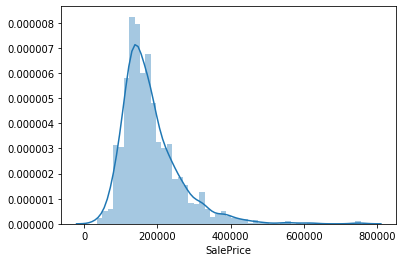

In [21]:
sns.distplot(train['SalePrice'])

In [26]:
ntrain=train.shape[0] #1460,80
ntest = test.shape[0] #1459,79
ytrain=train.SalePrice.values
ytrain

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

In [ ]:
# 트레이닝 데이터 + 테스트 데이터 => null 처리

In [62]:
pd.concat((train,test)).shape
# pd.concat((train,test)).reset_index(drop=True)
allData = pd.concat((train,test),ignore_index=True)
allData.columns
allData.drop(['SalePrice'],axis=1,inplace=True)
allData.shape

(2919, 79)

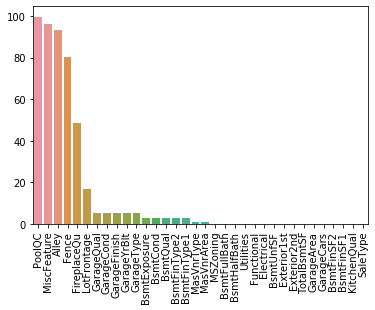

In [60]:
allNa = allData.isnull().sum()/len(allData)*100 # Na의 비율
allNa

# Na비율을 기준으로 내림차순 정렬을 하는데, Na=0인 것은 제외
allNa = allNa.drop(allNa[allNa==0].index).sort_values(ascending=False)
allNa
missingData=pd.DataFrame({'Na Ratio':allNa})
missingData

plt.xticks(rotation='90')
sns.barplot(x=allNa.index, y=allNa)